In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Hisse senedi verilerini yükleme
assets = ['THYAO.IS', 'TUPRS.IS', 'ASELS.IS','BRSAN.IS','TSGYO.IS']
pf_data = pd.DataFrame()

for a in assets:
    ticker = yf.Ticker(a)
    pf_data[a] = ticker.history(start='2014-01-01')['Close']

In [140]:
pf_data.tail()


,THYAO.IS,TUPRS.IS,ASELS.IS,BRSAN.IS,TSGYO.IS
Date,,,,,
2024-06-21 00:00:00+03:00,316.00,170.800003,61.500000,499.50,13.80
2024-06-24 00:00:00+03:00,310.25,171.600006,61.750000,485.00,13.80
2024-06-25 00:00:00+03:00,305.75,169.899994,59.900002,475.00,13.97
2024-06-26 00:00:00+03:00,301.00,165.399994,58.900002,457.00,14.82
2024-06-27 00:00:00+03:00,306.00,168.699997,60.099998,461.25,13.34


In [141]:
# Log getirileri hesaplama
log_returns = np.log(pf_data / pf_data.shift(1))

<Axes: xlabel='Date'>

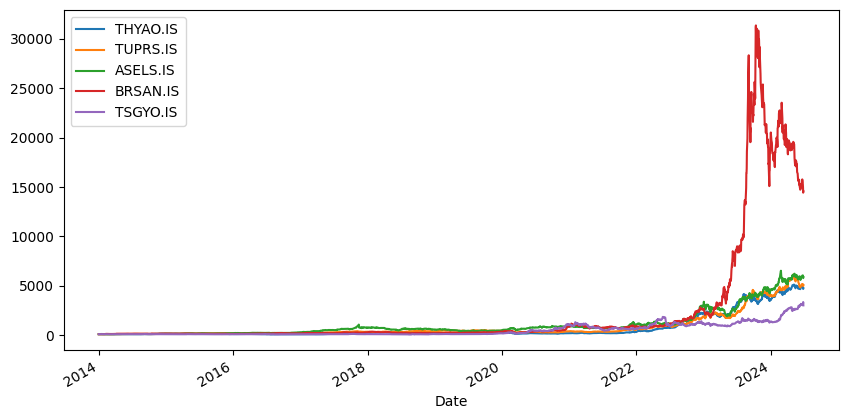

In [142]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [143]:
# Portföy sayısı
num_portfolios = 10000
num_assets = len(assets)

In [144]:
# Boş listeler oluşturma
pfolio_returns = []
pfolio_volatilities = []
pfolio_sharpe_ratios = []
pfolio_weights = []

# Risk-free rate (riskten arındırılmış getiri oranı)
rf = 0.01

# Monte Carlo simülasyonu
for _ in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    returns = np.sum(weights * log_returns.mean()) * 250
    volatility = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    sharpe_ratio = (returns - rf) / volatility

    pfolio_returns.append(returns)
    pfolio_volatilities.append(volatility)
    pfolio_sharpe_ratios.append(sharpe_ratio)
    pfolio_weights.append(weights)

# Portföy verilerini bir DataFrame'e dönüştürme
portfolios = pd.DataFrame({
    'Return': pfolio_returns,
    'Volatility': pfolio_volatilities,
    'Sharpe Ratio': pfolio_sharpe_ratios
})


In [145]:
for i, asset in enumerate(assets):
    portfolios[asset + ' Weight'] = [w[i] for w in pfolio_weights]

In [146]:
# Maksimum Sharpe oranına sahip portföyü bulma
max_sharpe_idx = portfolios['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = portfolios.loc[max_sharpe_idx]
max_sharpe_portfolio

Return             0.390122
Volatility         0.284325
Sharpe Ratio       1.336926
THYAO.IS Weight    0.042016
TUPRS.IS Weight    0.374430
ASELS.IS Weight    0.225788
BRSAN.IS Weight    0.264746
TSGYO.IS Weight    0.093020
Name: 6029, dtype: float64

In [147]:
# Minimum Volatiliteye sahip portföyü bulma
min_vol_idx = portfolios['Volatility'].idxmin()
min_vol_portfolio = portfolios.loc[min_vol_idx]
min_vol_portfolio

Return             0.370884
Volatility         0.275962
Sharpe Ratio       1.307729
THYAO.IS Weight    0.107731
TUPRS.IS Weight    0.385718
ASELS.IS Weight    0.236318
BRSAN.IS Weight    0.106421
TSGYO.IS Weight    0.163812
Name: 271, dtype: float64

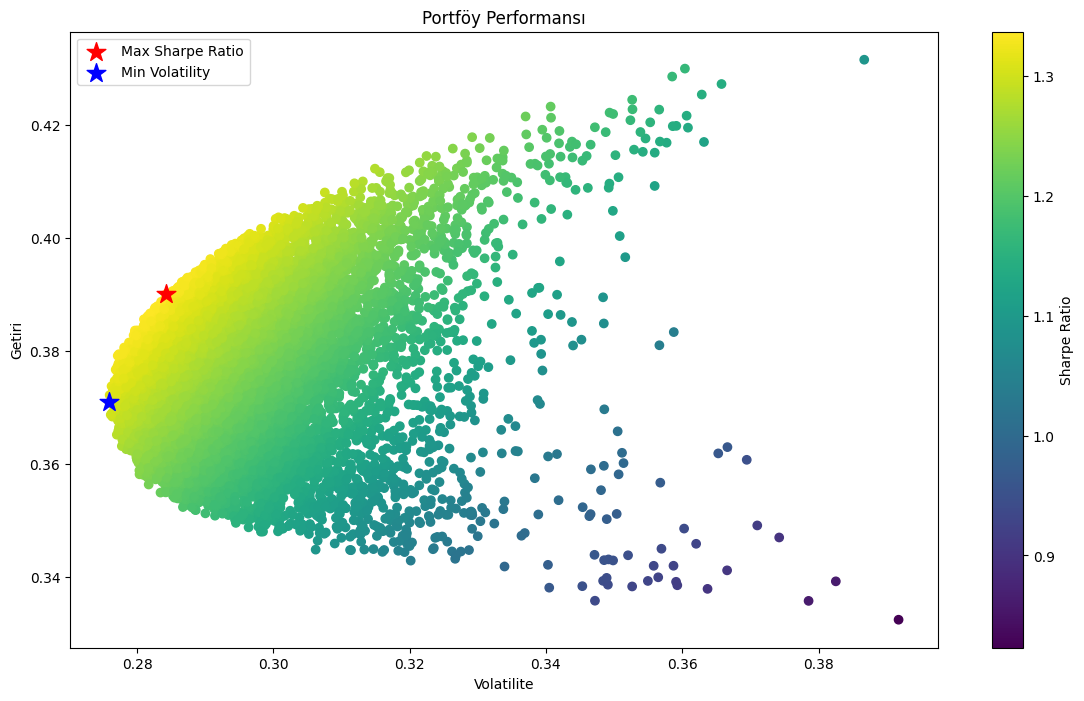

Maksimum Sharpe Oranlı Portföy:
 Return             0.390122
Volatility         0.284325
Sharpe Ratio       1.336926
THYAO.IS Weight    0.042016
TUPRS.IS Weight    0.374430
ASELS.IS Weight    0.225788
BRSAN.IS Weight    0.264746
TSGYO.IS Weight    0.093020
Name: 6029, dtype: float64

Minimum Volatiliteli Portföy:
 Return             0.370884
Volatility         0.275962
Sharpe Ratio       1.307729
THYAO.IS Weight    0.107731
TUPRS.IS Weight    0.385718
ASELS.IS Weight    0.236318
BRSAN.IS Weight    0.106421
TSGYO.IS Weight    0.163812
Name: 271, dtype: float64


In [149]:
# Maksimum Sharpe oranına sahip portföyü bulma
max_sharpe_idx = portfolios['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = portfolios.loc[max_sharpe_idx]

# Minimum Volatiliteye sahip portföyü bulma
min_vol_idx = portfolios['Volatility'].idxmin()
min_vol_portfolio = portfolios.loc[min_vol_idx]

# Portföyleri görselleştirme
plt.figure(figsize=(14, 8))
plt.scatter(portfolios['Volatility'], portfolios['Return'], c=portfolios['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], color='r', marker='*', s=200, label='Max Sharpe Ratio')
plt.scatter(min_vol_portfolio[1], min_vol_portfolio[0], color='b', marker='*', s=200, label='Min Volatility')
plt.title('Portföy Performansı')
plt.xlabel('Volatilite')
plt.ylabel('Getiri')
plt.legend()
plt.show()

print("Maksimum Sharpe Oranlı Portföy:\n", max_sharpe_portfolio)
print("\nMinimum Volatiliteli Portföy:\n", min_vol_portfolio)


In [150]:
max_vol_idx = portfolios['Volatility'].idxmax()
max_vol_portfolio = portfolios.loc[max_vol_idx]

# Maxsimum Volatiliteli Portföy
print("\nMaksimum Volatiliteli Portföy:\n", max_vol_portfolio)

# Günlük Getiri
daily_return = max_vol_portfolio['Return'] / 250

# Aylık Getiri
monthly_return = daily_return * 21

# Yıllık Getiri
annual_return = monthly_return * 12

# Hisse senedi başına düşen oran
stock_weights = []
for i, asset in enumerate(assets):
    stock_weights.append(max_vol_portfolio[asset + ' Weight'])

# Sonuçları yazdırma
print("\nHisse senedi başına düşen oran:")
for i, asset in enumerate(assets):
    print(f"{asset}: {stock_weights[i]:.2f}")

print("\nGünlük Getiri:", daily_return)
print("Aylık Getiri:", monthly_return)
print("Yıllık Getiri:", annual_return)



Maksimum Volatiliteli Portföy:
 Return             0.332415
Volatility         0.391748
Sharpe Ratio       0.823014
THYAO.IS Weight    0.191735
TUPRS.IS Weight    0.010326
ASELS.IS Weight    0.033701
BRSAN.IS Weight    0.030352
TSGYO.IS Weight    0.733886
Name: 9976, dtype: float64

Hisse senedi başına düşen oran:
THYAO.IS: 0.19
TUPRS.IS: 0.01
ASELS.IS: 0.03
BRSAN.IS: 0.03
TSGYO.IS: 0.73

Günlük Getiri: 0.0013296581514376637
Aylık Getiri: 0.02792282118019094
Yıllık Getiri: 0.3350738541622913
